# crop production

In [64]:
#import requried Libary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [26]:
#importing data from the drive
cp=pd.read_csv('/content/drive/MyDrive/Mycolllections/Crop_production.csv')

In [27]:
cp.head()

,Column1,State_Name,Crop_Type,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons,Yield_ton_per_hec
0,0,andhra pradesh,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0,1.287671
1,1,andhra pradesh,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0,0.303030
2,2,andhra pradesh,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0,1.009901
3,3,andhra pradesh,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0,1.750000
4,4,andhra pradesh,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0,0.384615


In [28]:
cp.shape

(99849, 13)

In [29]:
cp.columns

Index(['Column1', 'State_Name', 'Crop_Type', 'Crop', 'N', 'P', 'K', 'pH',
       'rainfall', 'temperature', 'Area_in_hectares', 'Production_in_tons',
       'Yield_ton_per_hec'],
      dtype='object')

In [30]:
#Column1-is not needed so remove from the df
cp=cp.drop('Column1',axis=1)
cp=cp.drop('Yield_ton_per_hec',axis=1)
cp.columns

Index(['State_Name', 'Crop_Type', 'Crop', 'N', 'P', 'K', 'pH', 'rainfall',
       'temperature', 'Area_in_hectares', 'Production_in_tons'],
      dtype='object')

In [31]:
cp.rename(columns={'Crop_Type':'Season'},inplace=True)

In [32]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State_Name          99849 non-null  object 
 1   Season              99849 non-null  object 
 2   Crop                99849 non-null  object 
 3   N                   99849 non-null  int64  
 4   P                   99849 non-null  int64  
 5   K                   99849 non-null  int64  
 6   pH                  99849 non-null  float64
 7   rainfall            99849 non-null  float64
 8   temperature         99849 non-null  float64
 9   Area_in_hectares    99849 non-null  float64
 10  Production_in_tons  99849 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB


In [33]:
#checking for null values
cp.isnull().sum()

State_Name            0
Season                0
Crop                  0
N                     0
P                     0
K                     0
pH                    0
rainfall              0
temperature           0
Area_in_hectares      0
Production_in_tons    0
dtype: int64

In [34]:
#checking for duplicate values
cp.duplicated().sum()

0

In [35]:
cp.describe()

,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons
count,99849.000000,99849.000000,99849.000000,99849.000000,99849.000000,99849.000000,99849.000000,9.984900e+04
mean,69.816823,41.593656,42.037827,5.643624,701.151085,26.684154,16476.585668,3.776291e+04
std,39.571469,15.056508,28.430263,0.505283,604.701552,4.851214,43604.268231,1.222447e+05
min,10.000000,10.000000,10.000000,3.820000,3.274569,1.180000,0.580000,0.000000e+00
25%,50.000000,40.000000,20.000000,5.360000,157.310000,23.106000,130.000000,1.620000e+02
50%,75.000000,40.000000,30.000000,5.540000,579.750000,27.333333,1010.000000,1.506000e+03
75%,80.000000,60.000000,50.000000,5.960000,1110.780000,29.266667,8099.000000,1.439500e+04
max,180.000000,125.000000,200.000000,7.000000,3322.060000,35.346667,726300.000000,3.530571e+06


In [36]:
cp.value_counts()

State_Name                   Season      Crop       N    P   K    pH    rainfall  temperature  Area_in_hectares  Production_in_tons
andaman and nicobar islands  kharif      arecanut   100  40  140  5.86  1925.680  27.000000    1254.0            2000.0                1
punjab                       rabi        wheat      60   30  30   6.40  66.520    20.312000    170000.0          730000.0              1
                                                                  6.50  66.520    20.312000    154000.0          545000.0              1
                                                                                               144000.0          517000.0              1
                                                                                               118000.0          550000.0              1
                                                                                                                                      ..
karnataka                    kharif      sunfl

<ipython-input-37-aabf98cb649f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=cp.corr(),cmap="YlGnBu",annot=True)


<Axes: >

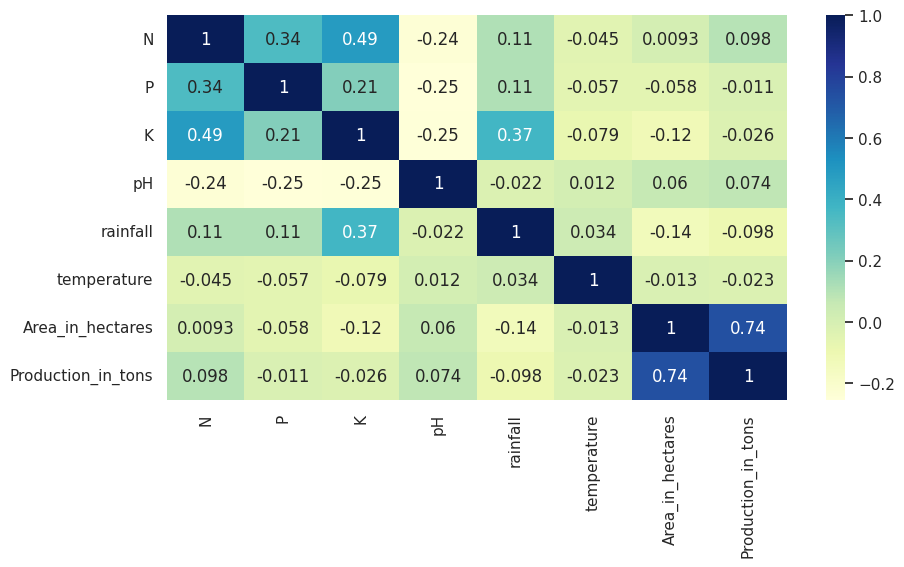

In [37]:
#visualizing the correlation.
plt.figure(figsize=(10,5))
sns.heatmap(data=cp.corr(),cmap="YlGnBu",annot=True)

<Axes: title={'center': 'crops'}, xlabel='count', ylabel='Crop'>

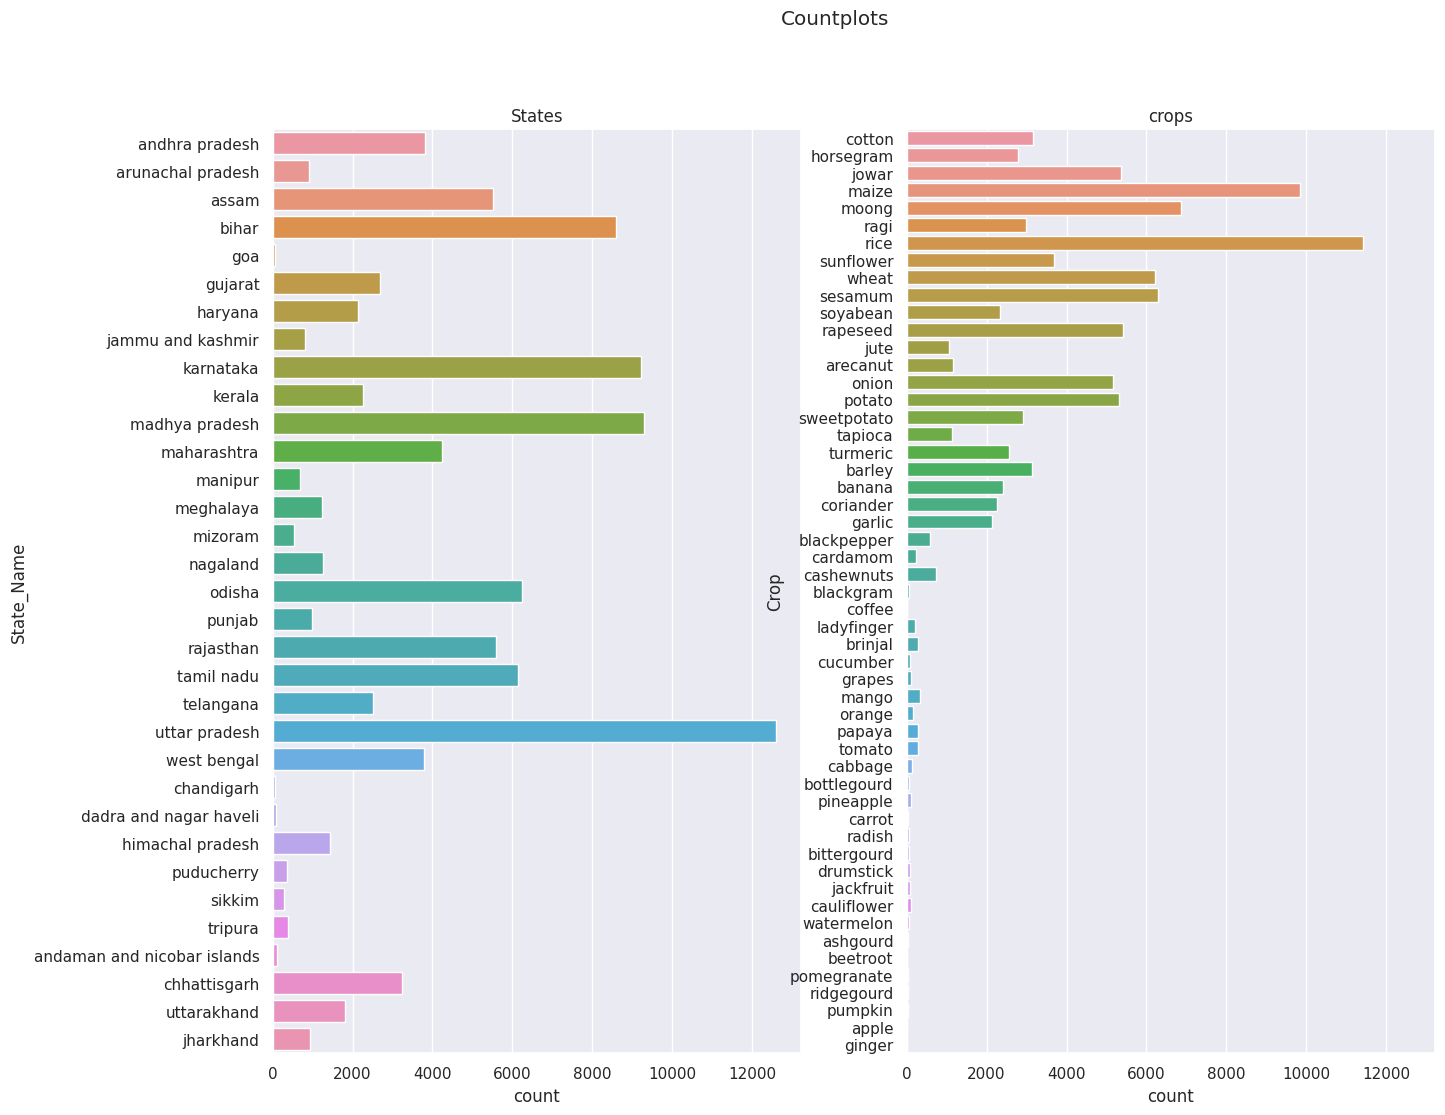

In [38]:
sns.set()
figure,axes=plt.subplots(1,2,sharex=True,figsize=(15,12))
figure.suptitle("Countplots")
axes[0].set_title('States')
axes[1].set_title('crops')

sns.countplot(data=cp,y='State_Name',ax=axes[0])
sns.countplot(data=cp,y='Crop',ax=axes[1])

<Axes: xlabel='Season', ylabel='count'>

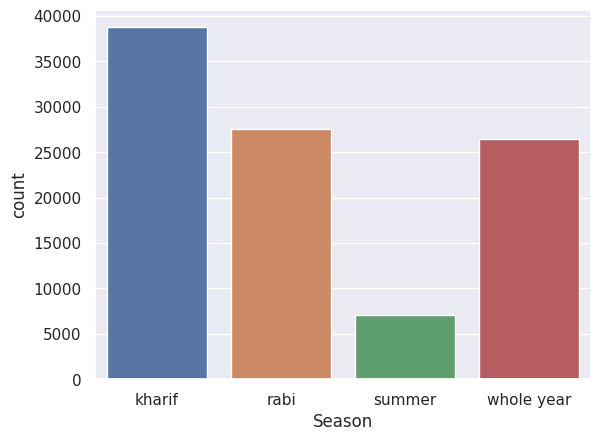

In [39]:
sns.countplot(data=cp,x='Season')

<Axes: xlabel='State_Name'>

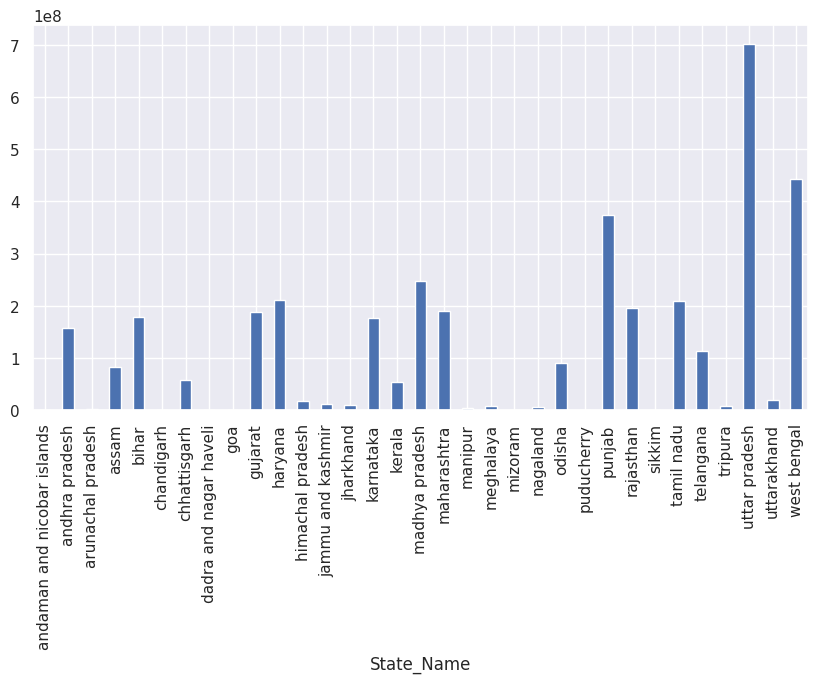

In [40]:
plt.figure(figsize=(10,5))
cp.groupby('State_Name')['Production_in_tons'].sum().plot.bar()

<Axes: ylabel='Production_in_tons'>

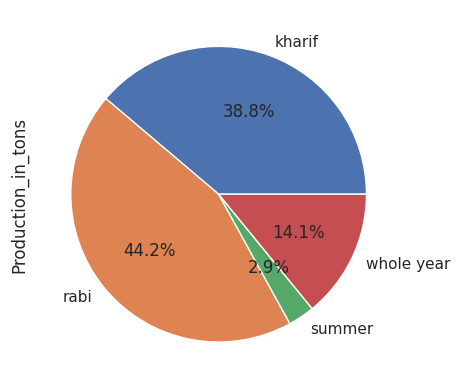

In [41]:
cp.groupby('Season')['Production_in_tons'].sum().plot.pie(autopct='%1.1f%%')

<Axes: xlabel='Crop'>

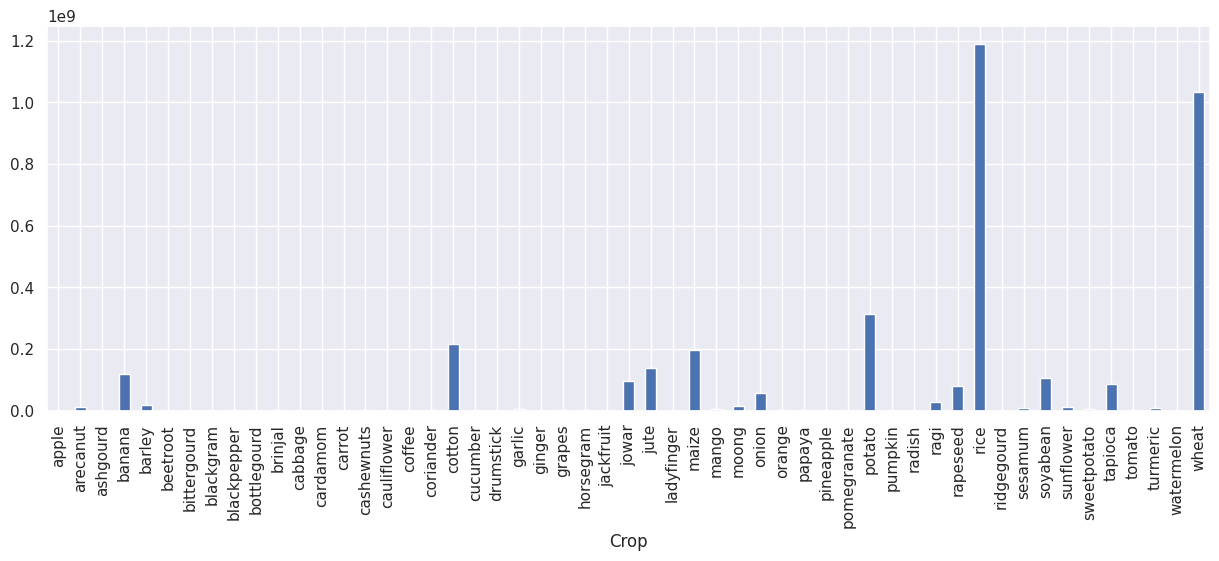

In [42]:
plt.figure(figsize=(15,5))
cp.groupby('Crop')['Production_in_tons'].sum().plot(kind='bar')

<Axes: xlabel='Season'>

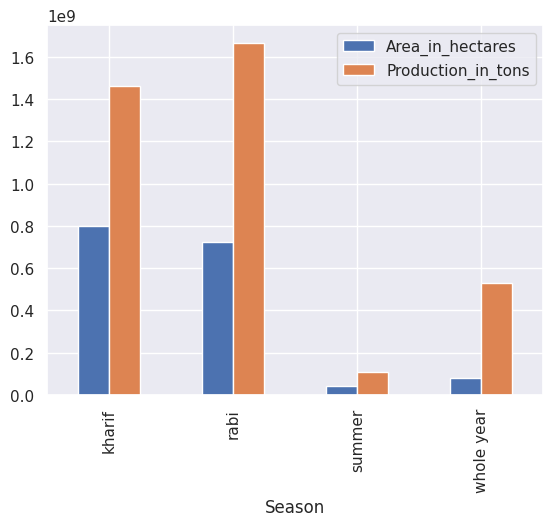

In [43]:
cp.groupby('Season')[['Area_in_hectares','Production_in_tons']].sum().plot(kind='bar')

In [44]:
# cp.groupby('Crop')[['Area_in_hectares','Production_in_tons']].sum()

<Axes: xlabel='State_Name'>

<Figure size 2000x500 with 0 Axes>

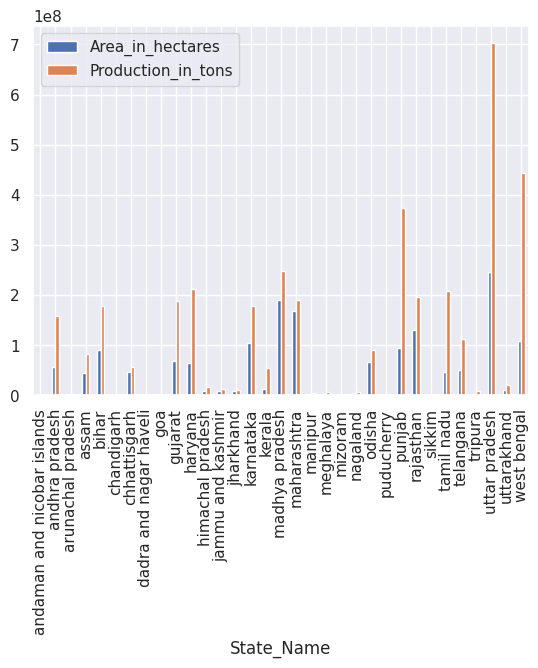

In [45]:
plt.figure(figsize=(20,5))
cp.groupby('State_Name')[['Area_in_hectares','Production_in_tons']].sum().plot(kind='bar')

# prepareing for ml model

Scale up or scale down to handle imbalance data in classification

SMOTER AND SMOGAN for regrission but it take over time to complete

<ipython-input-46-678f79cffcf1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cp['Production_in_tons'],bins=20,kde=False)


<Axes: xlabel='Production_in_tons'>

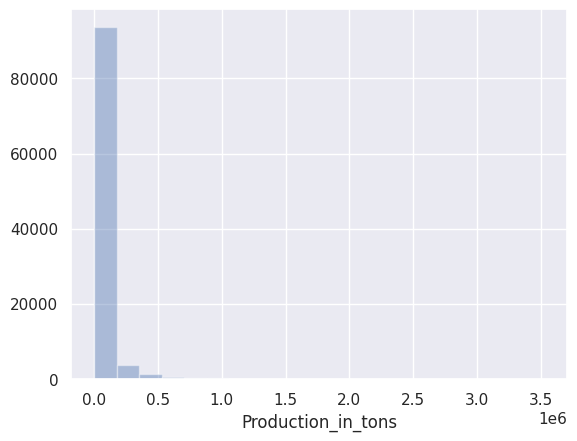

In [46]:
#plot the production to see the distribution
sns.distplot(cp['Production_in_tons'],bins=20,kde=False)

Text(0.5, 1.0, 'Pair plot')

<Figure size 2000x2000 with 0 Axes>

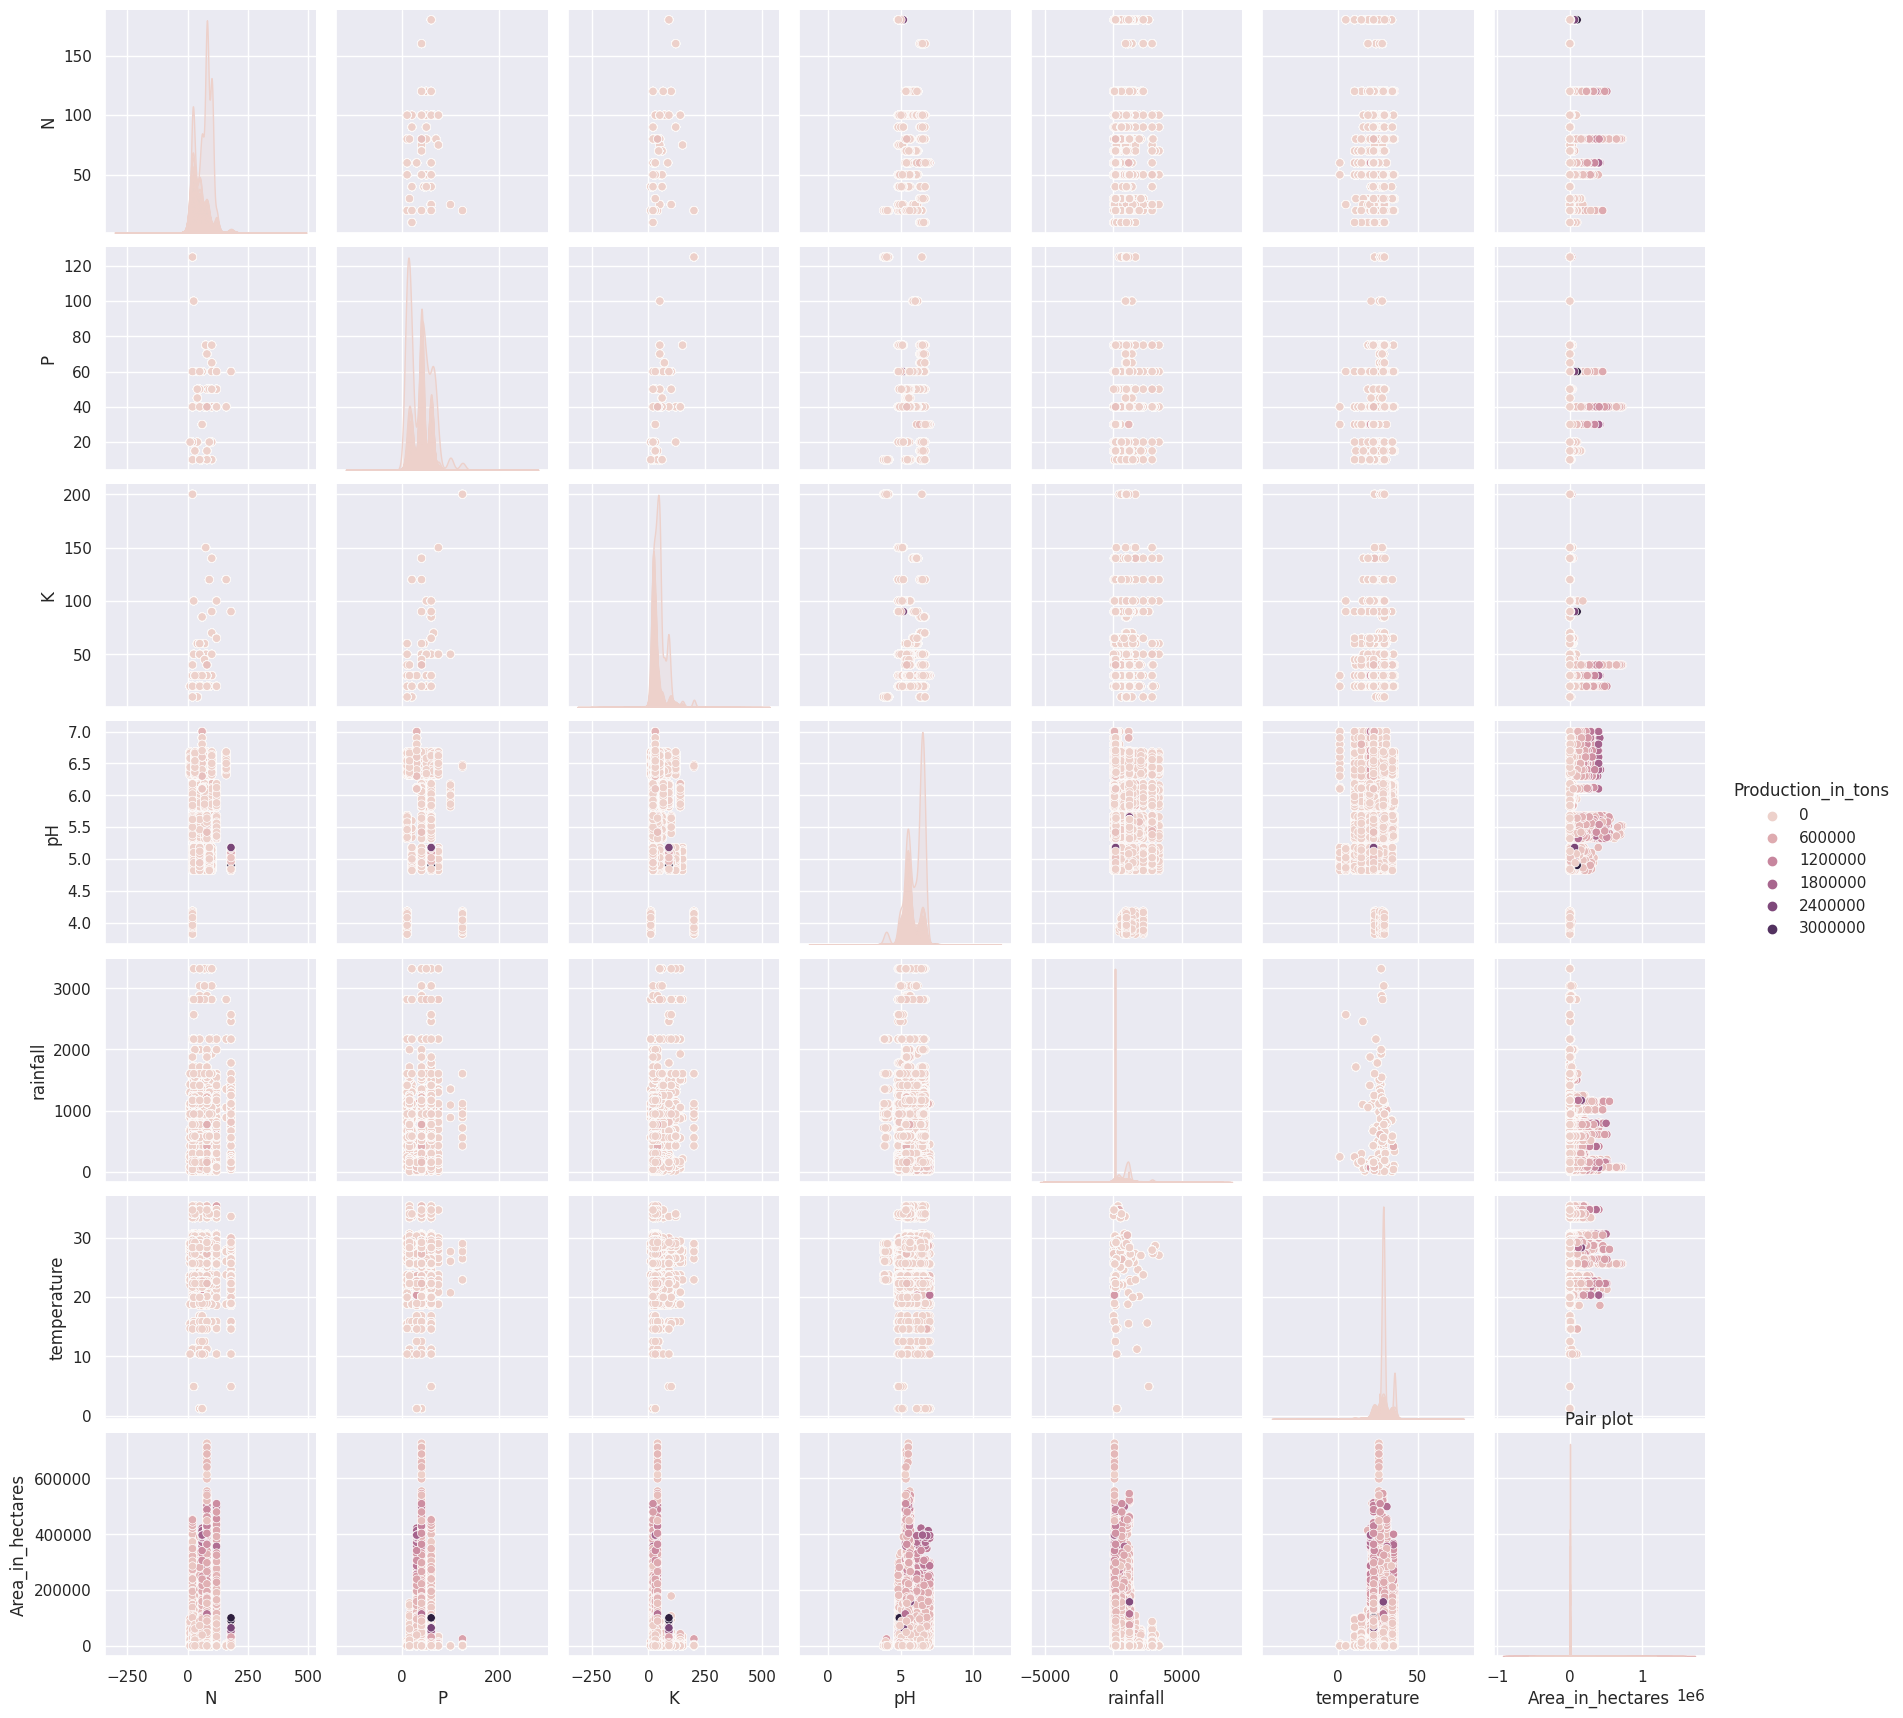

In [77]:
plt.figure(figsize=(20,20))
sns.pairplot(cp,hue='Production_in_tons')
plt.title('Pair plot') #taking 20mins

In [48]:
cpml=cp.drop('State_Name',axis=1)
cpml.head()

,Season,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons
0,kharif,cotton,120,40,20,5.46,654.34,29.266667,7300.0,9400.0
1,kharif,horsegram,20,60,20,6.18,654.34,29.266667,3300.0,1000.0
2,kharif,jowar,80,40,40,5.42,654.34,29.266667,10100.0,10200.0
3,kharif,maize,80,40,20,5.62,654.34,29.266667,2800.0,4900.0
4,kharif,moong,20,40,20,5.68,654.34,29.266667,1300.0,500.0


In [49]:
cpml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Season              99849 non-null  object 
 1   Crop                99849 non-null  object 
 2   N                   99849 non-null  int64  
 3   P                   99849 non-null  int64  
 4   K                   99849 non-null  int64  
 5   pH                  99849 non-null  float64
 6   rainfall            99849 non-null  float64
 7   temperature         99849 non-null  float64
 8   Area_in_hectares    99849 non-null  float64
 9   Production_in_tons  99849 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


encode the categorial value because model will understand only number

OneHot encoder will not suite for crops
Ordinal encoder will be ok but there is no order for any category

so we use Label encoder now

In [50]:
# from sklearn.preprocessing import LabelEncoder
#object Creation for labelEncoder

le=LabelEncoder()
le.fit_transform(cpml['Season'])

array([0, 0, 0, ..., 2, 1, 1])

In [51]:
for i in cpml:
  if cpml[i].dtype=='object':
    cpml[i]=le.fit_transform(cpml[i])

#after encoding
cpml.head()

,Season,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons
0,0,18,120,40,20,5.46,654.34,29.266667,7300.0,9400.0
1,0,24,20,60,20,6.18,654.34,29.266667,3300.0,1000.0
2,0,26,80,40,40,5.42,654.34,29.266667,10100.0,10200.0
3,0,29,80,40,20,5.62,654.34,29.266667,2800.0,4900.0
4,0,31,20,40,20,5.68,654.34,29.266667,1300.0,500.0


In [52]:
cpml.tail()

,Season,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares,Production_in_tons
99844,1,52,60,30,30,6.70,152.54,22.28,2013.0,5152.0
99845,2,29,80,40,20,5.68,182.50,29.20,258.0,391.0
99846,2,42,80,40,40,5.64,182.50,29.20,105.0,281.0
99847,1,42,80,40,40,5.42,152.54,22.28,152676.0,261435.0
99848,1,44,30,15,30,6.54,152.54,22.28,244.0,95.0


<Axes: >

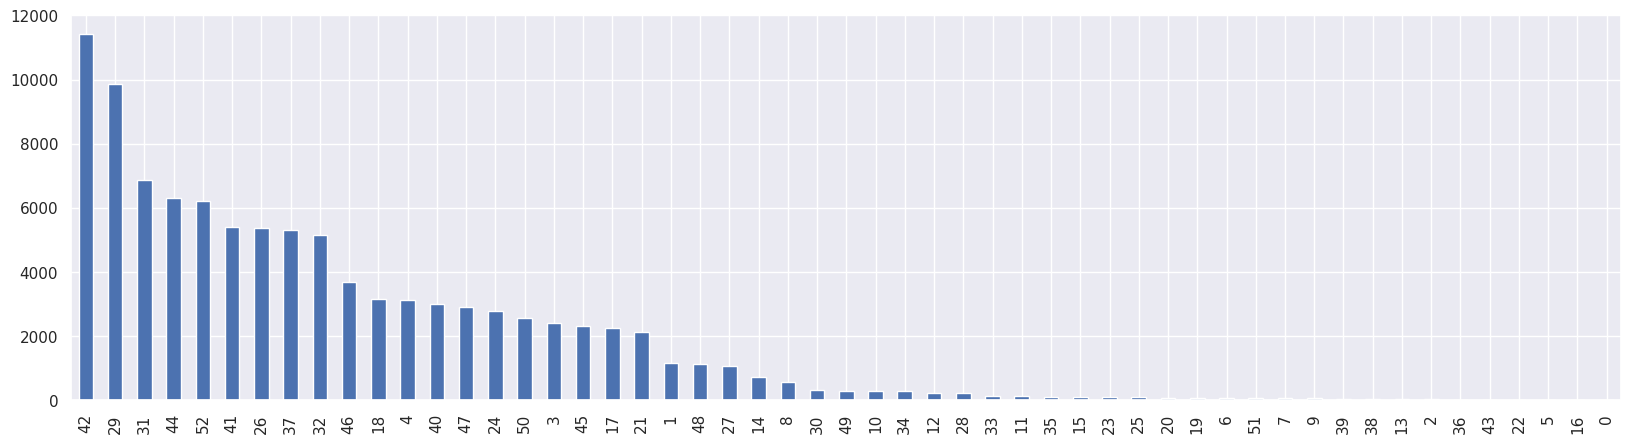

In [53]:
plt.figure(figsize=(20,5))
cpml['Crop'].value_counts().plot.bar()

x is the independent variable

y is dependent variable

In [54]:
#spliting training and testing data and also independent and dependent
#here the production is the dependent column and other are independent columns

x=cpml[['Season','Crop','N','P','K','pH','rainfall','temperature','Area_in_hectares']]
y=cpml['Production_in_tons']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=53)

In [55]:
x_train

,Season,Crop,N,P,K,pH,rainfall,temperature,Area_in_hectares
28716,3,50,25,60,100,5.08,1050.245,18.778182,38.0
40724,0,27,80,40,40,5.34,1543.760,27.333333,2800.0
37051,0,31,20,40,20,5.62,411.520,34.730000,400.0
31859,3,37,180,60,90,4.98,2569.520,4.900000,52.0
35907,0,45,20,60,20,5.58,607.480,26.366667,27200.0
...,...,...,...,...,...,...,...,...,...
46843,0,18,120,40,20,5.50,297.660,29.566667,15.0
55717,0,24,20,60,20,5.90,1110.780,25.666667,377.0
35701,3,21,50,10,60,5.68,1111.680,28.648182,146.0
58141,1,46,50,60,30,5.40,41.300,21.704000,1333.0


In [56]:
y_train

28716      126.0
40724    25760.0
37051      200.0
31859      307.0
35907    40900.0
          ...   
46843       28.0
55717      279.0
35701      554.0
58141     2200.0
56857      562.0
Name: Production_in_tons, Length: 79879, dtype: float64

In [57]:
print(x_test.shape)
print(y_test.shape)

(19970, 9)
(19970,)


# Selecting Model

In [58]:
#list the model need to be measured
# linear regression
# descision tree
# random forest
# # gradient boost

models={
    'Linear_Regression':LinearRegression(),
    'Random_forest':RandomForestRegressor(),
    'Decision_Tree':DecisionTreeRegressor(),
    'Gradient_Boost':GradientBoostingRegressor()
}


In [69]:
#dataframe to store scores
Model_scores=pd.DataFrame(columns=['Model_Name','MSE_train','R2_train','MAE_train','MSE_test','R2_test','MAE_test'])
Model_scores

,Model_Name,MSE_train,R2_train,MAE_train,MSE_test,R2_test,MAE_test


In [70]:
for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(x_train,y_train)

  #prediction
  train_pred=model.predict(x_train)
  test_pred=model.predict(x_test)

  #score of Training data

  MSE_train=mean_squared_error(y_train,train_pred)
  R2_train=r2_score(y_train,train_pred)
  MAE_train=mean_absolute_error(y_train,train_pred)


  #score of Testing data

  MSE_test=mean_squared_error(y_test,test_pred)
  R2_test=r2_score(y_test,test_pred)
  MAE_test=mean_absolute_error(y_test,test_pred)


  #Model_Name	MSE_train	R2_train	MAE_train	MSE_test	R2_test	MAE_test
  len_df=len(Model_scores)
  row=[list(models.keys())[i],MSE_train,R2_train,MAE_train,MSE_test,R2_test,MAE_test]
  Model_scores.loc[len_df]=row

  print(list(models.keys())[i],'  Training set model score  :',model.score(x_train,y_train))
  print(list(models.keys())[i],'  Testing set model score   :',model.score(x_test,y_test))
  print("==================================================================================")

Model_scores

Linear_Regression   Training set model score  : 0.5584366576646981
Linear_Regression   Testing set model score   : 0.5478184928833298
Random_forest   Training set model score  : 0.9895490033481409
Random_forest   Testing set model score   : 0.9184830208824715
Decision_Tree   Training set model score  : 0.9998947496129638
Decision_Tree   Testing set model score   : 0.8866208628927454
Gradient_Boost   Training set model score  : 0.8879047949883293
Gradient_Boost   Testing set model score   : 0.8594969480650216


,Model_Name,MSE_train,R2_train,MAE_train,MSE_test,R2_test,MAE_test
0,Linear_Regression,6.582218e+09,0.558437,27256.837538,6.824125e+09,0.547818,27503.733858
1,Random_forest,1.557891e+08,0.989549,3123.758962,1.230218e+09,0.918483,8670.291746
2,Decision_Tree,1.568928e+06,0.999895,29.341291,1.711068e+09,0.886621,10743.970950
3,Gradient_Boost,1.670961e+09,0.887905,14959.416501,2.120410e+09,0.859497,15541.479470


In [76]:
# From the above score.. we take RandomForestRegressor model for training

RFmodel=RandomForestRegressor()
RFmodel.fit(x_train,y_train)
fi=pd.DataFrame(x_train.columns,columns=['Features'])
fi['Importance']=RFmodel.feature_importances_
# fi


           Features  Importance
8  Area_in_hectares    0.629085
2                 N    0.103913
7       temperature    0.101154
6          rainfall    0.070395
1              Crop    0.042109
4                 K    0.029806
5                pH    0.017580
0            Season    0.004157
3                 P    0.001800


<Axes: xlabel='Importance', ylabel='Features'>

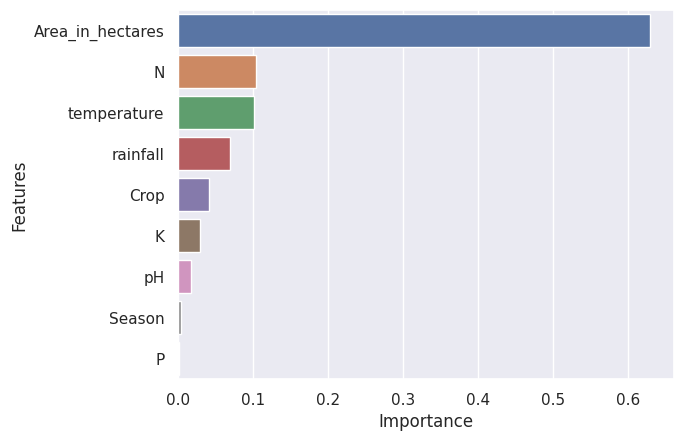

In [75]:
fi.sort_values('Importance',ascending=False,inplace=True)
print(fi)
sns.barplot(data=fi,x='Importance',y='Features')